In [26]:
%load_ext autoreload
%autoreload
from src.era5_dataset import ERA5Dataset, TimeMode
from src.fuxi import FuXi
import torch
from tqdm import tqdm
import os
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
train_ds = ERA5Dataset(
    '/Users/ksoll/git/DL4WeatherAndClimate/data/era5_6hourly.zarr',
    TimeMode.BETWEEN,
    start_time="2010-01-01T00:00:00",
    end_time="2011-12-31T18:00:00",
    max_autoregression_steps=365*4
)
print(len(train_ds))

1458



  0%|          | 0/1458 [00:00<?, ?it/s]

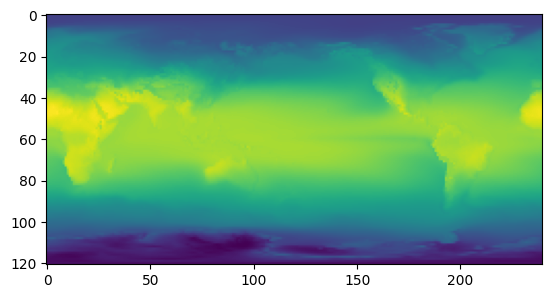

  0%|          | 0/1458 [00:29<?, ?it/s]

tensor(0.6668) 7.899688720703125 °C


In [27]:
for item in tqdm(train_ds):
    ts = item[0].reshape((item[0].shape[0],5,5,121,240))
    temp0 = ts[:,0,0,:,:].mean(dim=0)
    plt.imshow(temp0)
    plt.show()
    print(temp0.mean(), (temp0.mean()*(324.80637-193.48901)+193.48901-273.15).item(), "°C")
    break